In [19]:
from pydantic import BaseModel , Field 
from typing import Optional , List
from typing_extensions import TypedDict , Literal
import random

In [26]:
class Car (TypedDict) : 
    factory_name : str
    model_name : str 
    year_of_production : int 
    color : str
    enging_cap : str

In [27]:
def start_editing(state:Car) : 
    print("start_editing")
    return {"start_editing" : state["factory_name"] + "Done Edit"}

def cricket (state:Car):
    print("cricket")
    return {"cricket" : state["model_name"] + "Done cricket"}

def badminton (state:Car):
    print("badminton")
    return {"badminton" : state["enging_cap"] + "Done badminton"}

In [28]:
def routing(state:Car) -> Literal['cricket','badminton']: 
    year = state['year_of_production']

    if year > 2010 : 
        return "cricket"
    else : 
        return "badminton"

In [29]:
from IPython.display import Image,display
from langgraph.graph import StateGraph , START , END

graph = StateGraph(Car)

graph.add_node("start_editing",start_editing)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

graph.add_edge(START,"start_editing")
graph.add_conditional_edges("start_editing",routing)
graph.add_edge("badminton",END)
graph.add_edge("cricket",END)

final_graph = graph.compile()



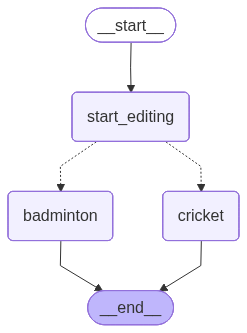

In [30]:
display(Image(final_graph.get_graph().draw_mermaid_png()))

In [32]:
final_graph.invoke({"factory_name":"mer" , "model_name":"s" , "year_of_production" : 2009 , "color":"red" , "enging_cap":"2000cc"})

start_editing
badminton


{'factory_name': 'mer',
 'model_name': 's',
 'year_of_production': 2009,
 'color': 'red',
 'enging_cap': '2000cc'}